In [92]:
import numpy as np
import pylab
%matplotlib inline

pylab.rc('xtick', labelsize=14.5) 
pylab.rc('ytick', labelsize=14.5) 
params = {'legend.fontsize': 15, 
          'legend.linewidth': 2} 

pylab.rcParams.update(params) 
text_size_label = 20

In [93]:

# RP for frequency=900MHz, delta_t=32s, delta_f=23.5kHz, Dec=-30deg, synthesis time=1h, total bandwidth=117.5kHz
rp = np.load("rp_2.439lambada_dec-30_900MHz_int32s_channel32.5kHz-synthesis1h.data")
r = np.load("rp_1.02lambada_dec-30_900MHz_int32s_channel32.5kHz-synthesis1h.data")
r1 = np.load("boxcar-int32.00s-bandwidth0.02MHz.data")

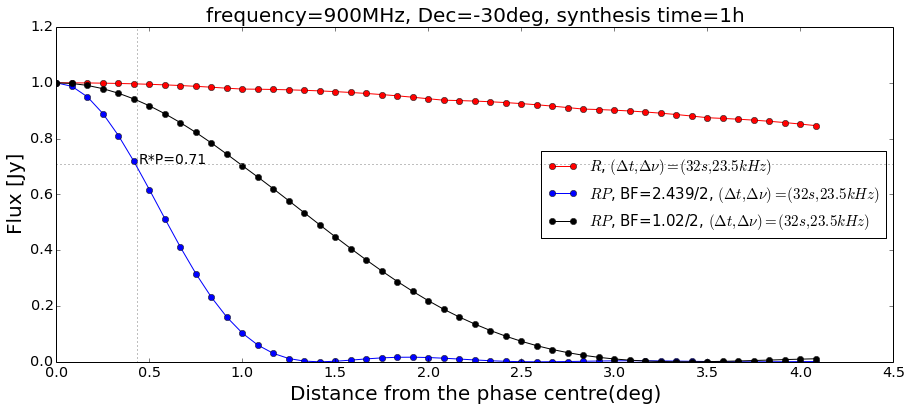

In [95]:
# beam width (2.439/2)(lambda/D) en radian
beamwidth = ((2.439*3e8)/(2.*900000000.*13.5))*90./np.pi
pylab.figure(figsize=(15, 6)) 
pylab.plot(r1['radius'], r1['flux'],'r-o',label=r"$R$, $(\Delta t,\Delta \nu)=(32s,23.5kHz)$")
pylab.plot(rp['radius'], rp['flux'],'b-o',label=r"$RP$, BF=2.439/2, $(\Delta t,\Delta \nu)=(32s,23.5kHz)$") 

pylab.plot(r['radius'], r['flux'],'k-o',label=r"$RP$, BF=1.02/2, $(\Delta t,\Delta \nu)=(32s,23.5kHz)$")
pylab.axvline(x=beamwidth/2.,color="0.5",ls=':')
pylab.axhline(y=rp['flux'][5]-0.01,color="0.5",ls=':')
pylab.title("frequency=900MHz, Dec=-30deg, synthesis time=1h",fontsize=text_size_label)
pylab.annotate('R*P=%.2f'%(rp['flux'][5]-0.01), xy=(149, 195), 
                xycoords='axes points', 
                horizontalalignment='right', verticalalignment='bottom', 
                fontsize=14) 

pylab.xlabel("Distance from the phase centre(deg)",fontsize=text_size_label)
pylab.ylabel("Flux [Jy]",fontsize=text_size_label)
pylab.legend(loc="center right")